# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Nur Anisah Fadhilah]
- **Email:** [nuranisahfadhilahh@gmail.com]
- **ID Dicoding:** [nur_anisah_fadhilah_m118d4kx1534_XHqe]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Menentukan Pertanyaan Bisnis

- Apakah terdapat pola peningkatan dalam jumlah peminjaman sepeda terkait dengan kondisi cuaca tertentu? Jika iya, cuaca seperti apa yang cenderung meningkatkan aktivitas peminjaman sepeda?
- Di waktu-waktu tertentu pada setiap harinya, kapan jumlah peminjaman sepeda cenderung mencapai puncaknya? Apakah terdapat pola tertentu dalam jam-jam tersebut?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Data Wrangling

### Gathering Data

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Colab Notebooks/archiive.zip', 'r') as zipobj:
  zipobj.extractall('/content/drive/MyDrive/Colab Notebooks')

In [ ]:
data_day = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/day.csv")
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
data_hour = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hour.csv")
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan informasi DataFrame data_day di atas, dapat dilihat bahwa terdapat sebanyak 16 kolom atau atribut data, sebanyak 731 baris data non-null untuk semua kolom data, dengan tipe data float64 sebanyak 4 kolom data, int64 sebanyak 11 kolom data, dan object sebanyak 1 kolom data.

In [ ]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan informasi DataFrame data_hour di atas, dapat dilihat bahwa terdapat sebanyak 16 kolom atau atribut data, sebanyak 17379 baris data non-null untuk semua kolom data, dengan tipe data float64 sebanyak 4 kolom data, int64 sebanyak 12 kolom data, dan object sebanyak 1 kolom data.

**Missing Value Checking**

In [ ]:
#Menentukan ada/tidaknya missing value pada dataset
data_day.isnull().values.any() #Jika True artinya ada data yg hilang

False

In [ ]:
data_hour.isnull().values.any() #Jika True artinya ada data yg hilang

False

Tidak ada data yang hilang, maka proses pencarian data hilang tidak akan dilakukan.

Duplicate Data Checking

In [ ]:
#Menentukan ada/tidaknya data yang terduplikasi pada dataset
print("Jumlah data terduplikasi:", data_day.duplicated().sum())

Jumlah data terduplikasi: 0


In [ ]:
print("Jumlah data terduplikasi:", data_hour.duplicated().sum())

Jumlah data terduplikasi: 0


Tidak ada data yang duplikat, maka tidak perlu melakukan drop/penghapusan kolom/baris.

In [ ]:
data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data


Karena kedua dataset dianggap bersih, tanpa adanya masalah seperti data duplikat atau data yang hilang, tidak diperlukan proses pembersihan data.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
#Mengelompokkan data berdasarkan cuaca dan jumlah peminjam
data_day.groupby('weathersit')['cnt'].mean().reset_index().sort_values("cnt")

,weathersit,cnt
2,3,1803.285714
1,2,4035.862348
0,1,4876.786177


In [ ]:
#Mengelompokkan data berdasarkan jam dan jumlah peminjam
data_hour.groupby('hr')['cnt'].mean().reset_index().sort_values("cnt")

,hr,cnt
4,4,6.352941
3,3,11.727403
5,5,19.889819
2,2,22.869930
1,1,33.375691
0,0,53.898072
6,6,76.044138
23,23,87.831044
22,22,131.335165
21,21,172.314560


## Visualization & Explanatory Analysis

### Pertanyaan 1:

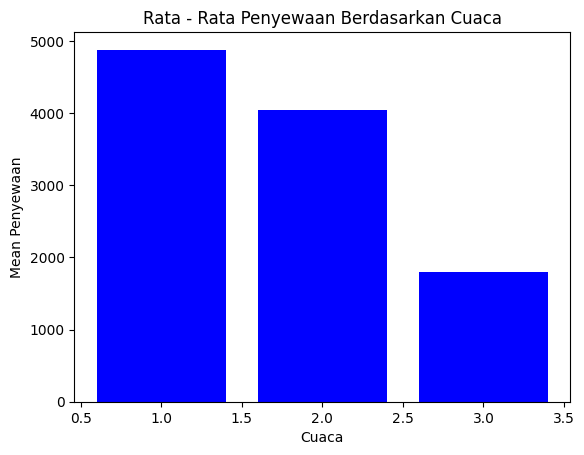

In [ ]:
jumlah_pinjam = data_day.groupby('weathersit')['cnt'].mean()

plt.bar(jumlah_pinjam.index, jumlah_pinjam.values, color='blue')

plt.title('Rata - Rata Penyewaan Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Mean Penyewaan')

plt.show()

### Pertanyaan 2:

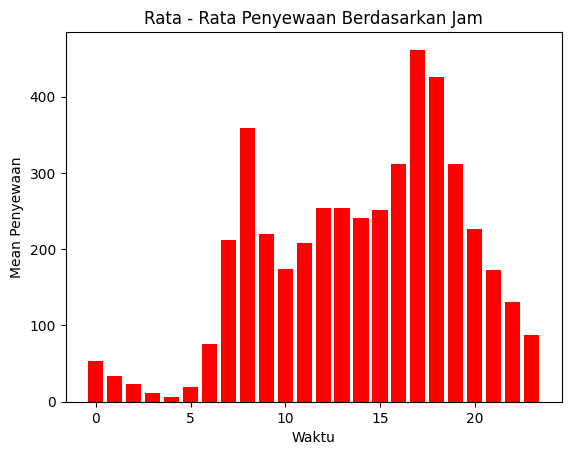

In [ ]:
jumlah_pinjam = data_hour.groupby('hr')['cnt'].mean()

plt.bar(jumlah_pinjam.index, jumlah_pinjam.values, color='red')

plt.title('Rata - Rata Penyewaan Berdasarkan Jam')
plt.xlabel('Waktu')
plt.ylabel('Mean Penyewaan')

plt.show()

## Conclusion

Conclusion Pertanyaan 1 (Apakah terdapat pola peningkatan dalam jumlah peminjaman sepeda terkait dengan kondisi cuaca tertentu? Jika iya, cuaca seperti apa yang cenderung meningkatkan aktivitas peminjaman sepeda?)

1: Cerah, Berawan

2: Mendung, Berembun

3: Hujan, Kabut

4: Salju, Angin Kencang

Angka 1-3 merepresentasikan cuaca, di mana telah dijelaskan keterangan dari angka-angka tersebut. Dapat disimpulkan bahwa pada cuaca (1) di mana cuaca bersih dan berawan angka penyewaan sepeda meningkat lalu diikuti oleh cuaca (2) dan (3). Sedangkan di cuaca (4) tidak terdapat record peminjaman sepeda sama sekali.

Conclusion Pertanyaan 2 (Di waktu-waktu tertentu pada setiap harinya, kapan jumlah peminjaman sepeda cenderung mencapai puncaknya? Apakah terdapat pola tertentu dalam jam-jam tersebut?)

Berdasarkan barplot tersebut, dapat dilihat bahwa angka peminjaman paling tinggi berada di antara pukul 17-18. Hal ini mungkin terjadi dikarenakan waktu tersebut merupakan waktu selesai aktivitas di daerah tersebut. Diikuti pada pukul 8 di mana kemungkinan merupakan waktu mulai beraktivitas.

In [ ]:
pip install streamlit

In [ ]:
bike_data.to_csv("all_data.csv", index=False)